#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Water_Quality_Prediction.csv')

In [3]:
df.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [4]:
df.shape

(1048575, 24)

In [5]:
df.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,1.048575e+06,1.028344e+06,1.041584e+06,1.029880e+06,1.017741e+06,1.043891e+06,1.020900e+06,1.039881e+06,1.015357e+06,1.013693e+06,...,1.014050e+06,1.019772e+06,1.038413e+06,1.029236e+06,1.048277e+06,1.018887e+06,1.043272e+06,1.031026e+06,1.028214e+06,1.048575e+06
mean,5.242870e+05,7.449869e+00,1.139646e-01,6.078584e+00,1.818660e+02,1.291635e-03,1.528928e+00,4.835915e-01,9.410137e-01,4.939443e-01,...,1.446009e+02,4.248376e+02,3.236978e+00,9.352826e-02,2.647872e+02,1.915360e+01,6.003251e+01,1.573196e+01,1.149062e+01,2.295821e-01
std,3.026977e+05,8.478455e-01,4.433188e-01,3.131874e+00,6.576657e+01,3.030129e-02,1.505436e+00,8.614735e-01,7.924903e-01,5.662430e-01,...,6.672156e+01,1.897561e+02,7.150808e-01,4.403703e-01,1.543697e+02,1.137963e+01,1.808397e+01,8.798726e+00,6.925925e+00,4.205643e-01
min,0.000000e+00,2.058008e+00,2.050000e-53,2.861727e-01,2.941350e+01,0.000000e+00,6.350000e-07,1.410000e-14,4.550000e-06,2.100000e-09,...,1.194073e+01,1.305482e+01,9.994110e-01,1.380000e-46,1.064299e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,6.914812e+00,8.950000e-06,3.952811e+00,1.374347e+02,8.290000e-123,4.127921e-01,3.692472e-02,3.706065e-01,1.260900e-01,...,9.746143e+01,2.863260e+02,2.737515e+00,2.060000e-06,1.318069e+02,1.135982e+01,4.784209e+01,8.000000e+00,5.000000e+00,0.000000e+00
50%,5.242870e+05,7.452940e+00,2.054149e-03,5.564798e+00,1.747464e+02,1.520000e-62,1.074800e+00,1.997574e-01,7.654291e-01,3.389322e-01,...,1.339778e+02,3.970023e+02,3.198937e+00,5.372950e-04,2.635694e+02,1.646738e+01,6.002168e+01,1.600000e+01,1.100000e+01,0.000000e+00
75%,7.864305e+05,8.001406e+00,4.977795e-02,7.584930e+00,2.156446e+02,2.820000e-27,2.214154e+00,5.928613e-01,1.318265e+00,6.789152e-01,...,1.803459e+02,5.333383e+02,3.685177e+00,1.369394e-02,3.949597e+02,2.386571e+01,7.223478e+01,2.300000e+01,1.700000e+01,0.000000e+00
max,1.048574e+06,1.289196e+01,1.574860e+01,7.307293e+01,1.430549e+03,3.503948e+00,2.836867e+01,1.929611e+01,1.285171e+01,1.139056e+01,...,1.393433e+03,1.891516e+03,1.068842e+01,2.374086e+01,5.797995e+02,2.430051e+02,1.440785e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  float64
 14  Ch

In [7]:
df.isnull().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

In [8]:
cols_to_drop = [
    'Copper',     # High missing, likely not essential
    'Sulfate',    # High missing, possibly redundant
    'Odor'        # Subjective + high missing
]
df.drop(columns=cols_to_drop, inplace=True)


In [9]:
df.drop(columns=['Time of Day','Index'], axis=1, inplace=True)


In [10]:
df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Target
0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,471.683357,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,0
1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,432.844908,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,0
2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,0
3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,237.028468,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,0
4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,0


In [12]:
df['Source'].value_counts()

Source
Well         129654
Aquifer      129609
Stream       129574
Ground       129433
River        128978
Lake         128637
Reservoir    128582
Spring       128573
Name: count, dtype: int64

In [13]:
df['Month'].value_counts()

Month
January      88217
August       87855
May          87698
March        87585
July         87464
October      87441
December     87314
June         84909
April        84744
November     84645
September    84461
February     79321
Name: count, dtype: int64

In [14]:
df['Color'].value_counts()

Color
Colorless         326033
Near Colorless    325799
Faint Yellow      188039
Light Yellow      124775
Yellow             82948
Name: count, dtype: int64

In [15]:
df['Target'].value_counts()

Target
0    807841
1    240734
Name: count, dtype: int64

In [11]:
missing_rows = df.isnull().any(axis=1).sum()
print(f"Rows with at least one missing value: {missing_rows}")
print(f"Percentage of total data: {100 * missing_rows / len(df):.2f}%")


Rows with at least one missing value: 260192
Percentage of total data: 24.81%


#### Creating preprocessing pipelines for each data type WITH IMPUTATION and combining them using column transformer

In [17]:

# Define columns
categorical_cols = ['Color', 'Source', 'Month']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Target', errors='ignore')

# Create preprocessing pipelines for each data type WITH IMPUTATION
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Split data BEFORE any preprocessing (use RAW data with missing values)
x = df.drop('Target', axis=1)
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)



#### Model training using Pipeline

🔍 Model: Decision Tree
✅ Accuracy: 81.97%
              precision    recall  f1-score   support

           0       0.90      0.86      0.88    161568
           1       0.60      0.67      0.63     48147

    accuracy                           0.82    209715
   macro avg       0.75      0.77      0.76    209715
weighted avg       0.83      0.82      0.82    209715



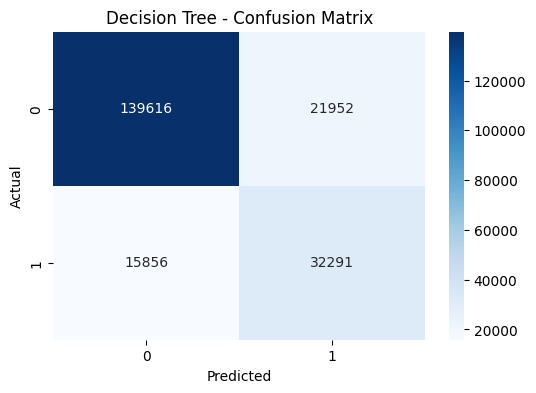

--------------------------------------------------
🔍 Model: Naive Bayes
✅ Accuracy: 82.18%
              precision    recall  f1-score   support

           0       0.87      0.90      0.89    161568
           1       0.62      0.56      0.59     48147

    accuracy                           0.82    209715
   macro avg       0.75      0.73      0.74    209715
weighted avg       0.82      0.82      0.82    209715



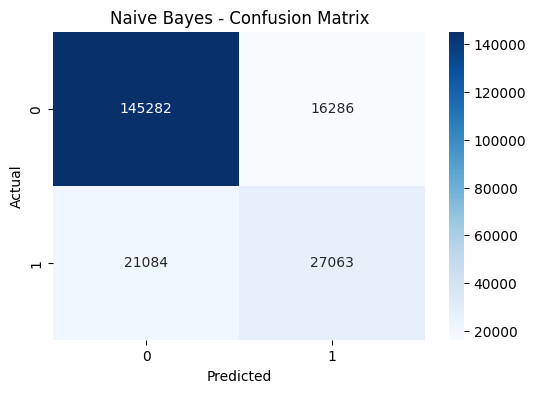

--------------------------------------------------
🔍 Model: Random Forest
✅ Accuracy: 86.96%
              precision    recall  f1-score   support

           0       0.98      0.85      0.91    161568
           1       0.65      0.94      0.77     48147

    accuracy                           0.87    209715
   macro avg       0.81      0.89      0.84    209715
weighted avg       0.90      0.87      0.88    209715



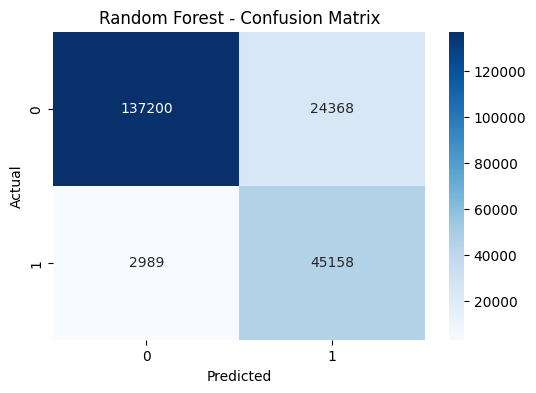

--------------------------------------------------
🔍 Model: Gradient Boosting
✅ Accuracy: 85.0%
              precision    recall  f1-score   support

           0       0.93      0.87      0.90    161568
           1       0.64      0.78      0.70     48147

    accuracy                           0.85    209715
   macro avg       0.79      0.82      0.80    209715
weighted avg       0.86      0.85      0.85    209715



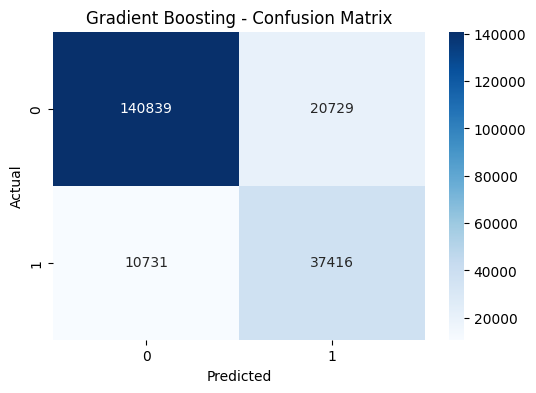

--------------------------------------------------


In [18]:
# Define models
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

# Train and evaluate models
for name, clf in models:
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),       # Includes imputation + scaling/encoding
        ('smote', SMOTE(random_state=42)),
        ('classifier', clf)
    ])

    pipeline.fit(x_train, y_train)            # Raw training data (with missing values)
    y_pred = pipeline.predict(x_test)         # Raw test data (with missing values)

    print(f"🔍 Model: {name}")
    print(f"✅ Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * 50)

#### Hyperparameter tuning for Random Forest and Gradient Boosting


🚀 Tuning Random Forest...

Fitting 2 folds for each of 10 candidates, totalling 20 fits
✅ Random Forest Best Params: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20}
🎯 Accuracy: 86.35%
              precision    recall  f1-score   support

           0       0.98      0.84      0.90    161568
           1       0.64      0.94      0.76     48147

    accuracy                           0.86    209715
   macro avg       0.81      0.89      0.83    209715
weighted avg       0.90      0.86      0.87    209715



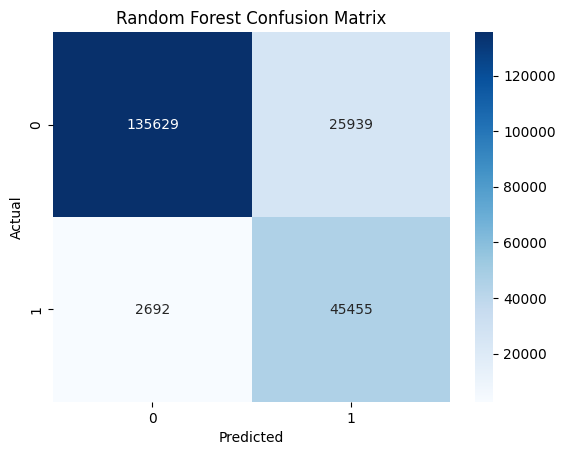


🚀 Tuning Gradient Boosting...

Fitting 2 folds for each of 10 candidates, totalling 20 fits
✅ Gradient Boosting Best Params: {'classifier__subsample': 0.8, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.05}
🎯 Accuracy: 85.55%
              precision    recall  f1-score   support

           0       0.95      0.86      0.90    161568
           1       0.64      0.84      0.73     48147

    accuracy                           0.86    209715
   macro avg       0.79      0.85      0.81    209715
weighted avg       0.88      0.86      0.86    209715



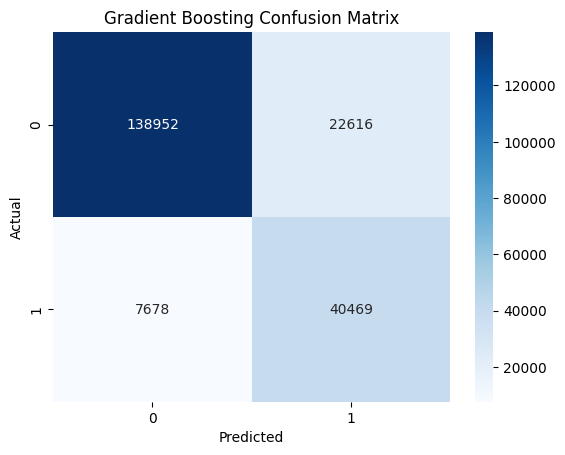

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sample smaller training set
x_small = x_train.sample(n=100000, random_state=42)
y_small = y_train.loc[x_small.index]

# 2. Define models & their parameter grids
models = {
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__max_features': ['sqrt', 'log2']
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.05, 0.1],
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__subsample': [0.8, 1.0]
        }
    )
}

# 3. Run loop (no comparison DataFrame)
for name, (clf, param_dist) in models.items():
    print(f"\n🚀 Tuning {name}...\n")

    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', clf)
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=10,
        scoring='recall',   # focus on minority recall
        cv=2,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    search.fit(x_small, y_small)
    best_model = search.best_estimator_
    y_pred = best_model.predict(x_test)

    # Print report
    print(f"✅ {name} Best Params: {search.best_params_}")
    print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix heatmap
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


#### Final training using Random Forest

🎯 Final Model Evaluation on Test Set
✅ Accuracy: 86.37%
              precision    recall  f1-score   support

           0       0.98      0.84      0.90    161568
           1       0.64      0.95      0.76     48147

    accuracy                           0.86    209715
   macro avg       0.81      0.89      0.83    209715
weighted avg       0.90      0.86      0.87    209715



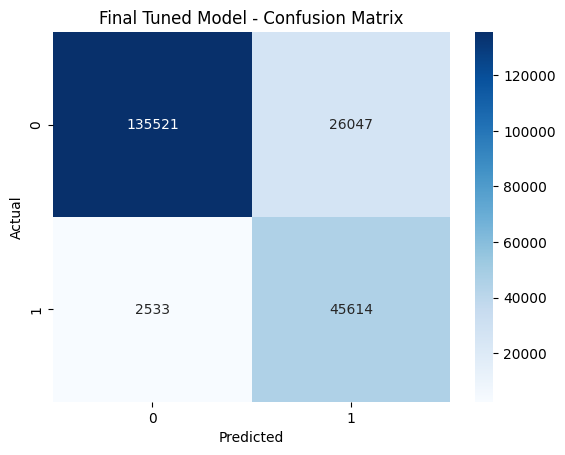

In [25]:
# Final tuned model pipeline
final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42
    ))
])

# Fit on full training data
final_pipeline.fit(x_train, y_train)

# Predict on test set
y_final_pred = final_pipeline.predict(x_test)
# Evaluation
print("🎯 Final Model Evaluation on Test Set")
print(f"✅ Accuracy: {round(accuracy_score(y_test, y_final_pred)*100, 2)}%")
print(classification_report(y_test, y_final_pred))

sns.heatmap(confusion_matrix(y_test, y_final_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Final Tuned Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### ROC Curve - AUC Score

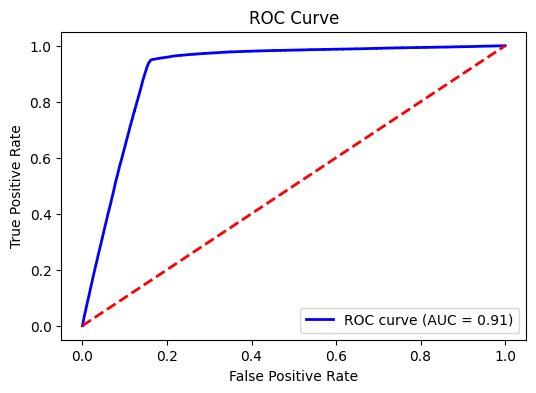

ROC-AUC Score: 0.9080478409742252


In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = final_pipeline.predict_proba(x_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))


#### safe water sample prediction


In [34]:
import pandas as pd

# Sample input in the correct format
test_data = {
    'pH': [7.45294],
    'Iron': [1.280000e-10],
    'Nitrate': [4.646518],
    'Chloride': [126.838658],
    'Lead': [5.100000e-28],
    'Zinc': [0.047645],
    'Color': ['Colorless'],
    'Turbidity': [0.026987],
    'Fluoride': [0.663294],
    'Conductivity': [416.760659],
    'Chlorine': [3.252276],
    'Manganese': [0.027935],
    'Total Dissolved Solids': [127.253348],
    'Source': ['Reservoir'],
    'Water Temperature': [19.07164],
    'Air Temperature': [70.36231],
    'Month': ['August'],
    'Day': [5.0]
}

test_df = pd.DataFrame(test_data)

# Predict class and probability
pred = final_pipeline.predict(test_df)
proba = final_pipeline.predict_proba(test_df)

# Better formatted output
label = "Safe" if pred[0] == 0 else "Not Safe"
prob_safe = round(proba[0][0] * 100, 2)
prob_not_safe = round(proba[0][1] * 100, 2)

print(f"✅ Prediction: {label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")

threshold = 0.4
custom_pred = 1 if proba[0][1] > threshold else 0
label = "Safe" if custom_pred == 0 else "Not Safe"

print(f"✅ Custom Threshold Prediction: {label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")






✅ Prediction: Safe
🔢 Safe: 96.07% | Not Safe: 3.93%
✅ Custom Threshold Prediction: Safe
🔢 Safe: 96.07% | Not Safe: 3.93%


#### Not safe water sample prediction

In [36]:
import pandas as pd

# Sample input representing unsafe water
test_data = {
    'pH': [3.2],  # very acidic
    'Iron': [3.5],  # high iron
    'Nitrate': [80.0],  # unsafe nitrate level
    'Chloride': [350.0],  # high chloride
    'Lead': [0.1],  # unsafe lead level
    'Zinc': [1.0],
    'Color': ['Yellow'],  # darkest category
    'Turbidity': [10.0],  # very turbid
    'Fluoride': [4.5],  # above safe limits
    'Conductivity': [1200.0],  # high conductivity
    'Chlorine': [6.0],  # excessive chlorine
    'Manganese': [0.6],  # very high
    'Total Dissolved Solids': [1400.0],  # above WHO limit
    'Source': ['Lake'],  # more prone to contamination
    'Water Temperature': [35.0],
    'Air Temperature': [42.0],
    'Month': ['May'],
    'Day': [15.0]
}

test_df = pd.DataFrame(test_data)

# Predict class and probability
pred = final_pipeline.predict(test_df)
proba = final_pipeline.predict_proba(test_df)

# Better formatted output
label = "Safe" if pred[0] == 0 else "Not Safe"
prob_safe = round(proba[0][0] * 100, 2)
prob_not_safe = round(proba[0][1] * 100, 2)

print(f"✅ Prediction: {label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")

# Optional: Custom threshold (e.g., 40%)
threshold = 0.4
custom_pred = 1 if proba[0][1] > threshold else 0
custom_label = "Safe" if custom_pred == 0 else "Not Safe"

print(f"✅ Custom Threshold Prediction: {custom_label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")


✅ Prediction: Not Safe
🔢 Safe: 41.46% | Not Safe: 58.54%
✅ Custom Threshold Prediction: Not Safe
🔢 Safe: 41.46% | Not Safe: 58.54%


#### Save the trained model using joblib as the dataset is very large

In [31]:
import joblib

# Save your trained pipeline model
joblib.dump(final_pipeline, 'final_model.joblib')


['final_model.joblib']

In [32]:

# Load model
model = joblib.load('final_model.joblib')

